In [49]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
from scipy.optimize import curve_fit

### Оценка времени работы

In [2]:
def getTestResult(size: int):
    global path, executableName
    result = subprocess.Popen([path+executableName, str(size)], stdout = subprocess.PIPE)
    stdout, stderr = result.communicate()
    data = {}
    for s in stdout.decode('utf-8').split("\n"):
        if s:
            data[s.split()[0]] = [int(s.split()[1])]
    return pd.DataFrame(data)

In [3]:
path = r"/home/vladimir/Рабочий стол/BOTAY!/CplusplusHOMEWORK/lesson_23/task2"
executableName = r"/sortTime"

In [27]:
sizes = np.logspace(1, 6, 6, dtype = np.int64)
data = pd.concat([getTestResult(size) for size in sizes])

In [28]:
data

,vector-std::sort,deque-std::sort,list.sort(),forward_list.sort()
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,3,6,9,5
0,49,68,118,114
0,472,691,1260,1304


In [39]:
sizes = np.arange(1e1, 1e5, 250, dtype = np.int64)
data = pd.concat([getTestResult(size) for size in sizes])

/tmp/ipykernel_46102/667691764.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label,y in data.iteritems():


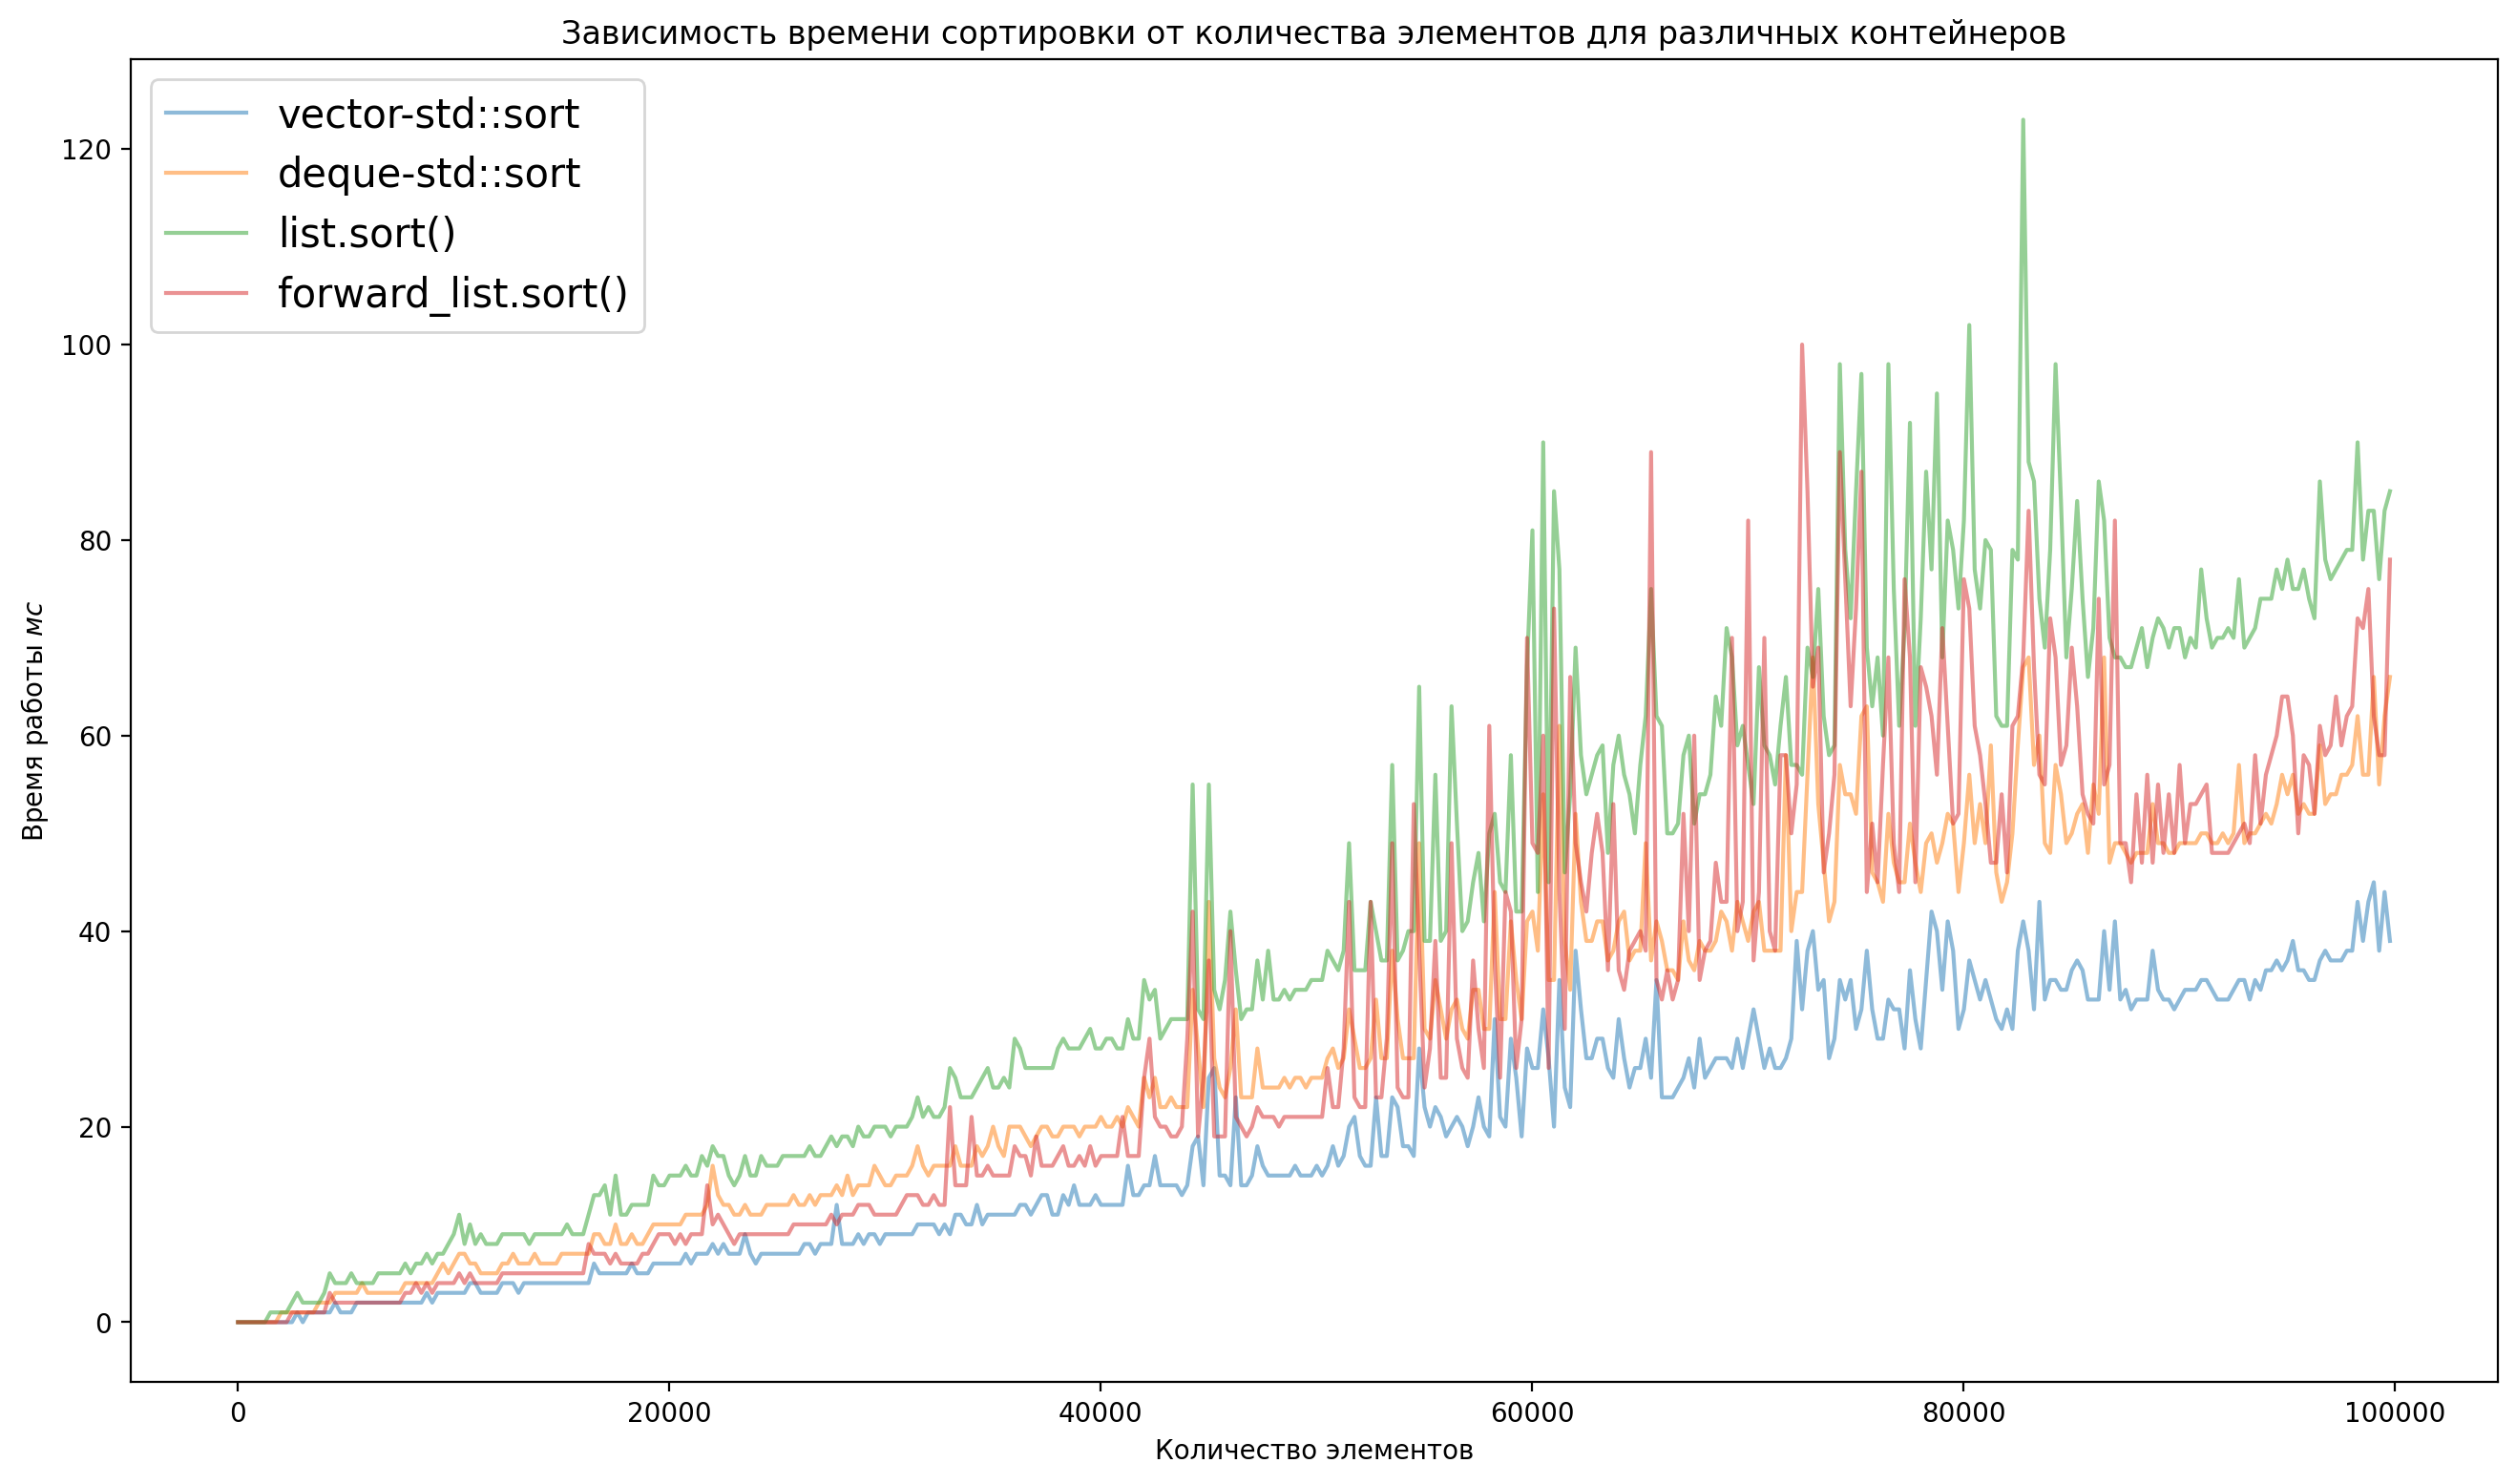

In [25]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 200)

for label,y in data.iteritems():
    plt.plot(sizes, y, label = label, alpha = 0.5)

plt.xlabel("Количество элементов")
plt.ylabel("Время работы $мс$")
plt.title("Зависимость времени сортировки от количества элементов для различных контейнеров")
plt.legend(loc = 'upper left', fontsize = 15);

### Интерполяция

In [47]:
def ONLogN(n: np.ndarray, O: float):
    return O*n*np.log2(n)

In [67]:
xAx = np.linspace(0, max(sizes), 2000)
poptVector, _ = curve_fit(ONLogN, sizes, data["vector-std::sort"], p0 = [0.2])
poptDeque, _ = curve_fit(ONLogN, sizes, data["deque-std::sort"], p0 = [0.2])
poptList, _ = curve_fit(ONLogN, sizes, data["list.sort()"], p0 = [0.2])
poptForwardList, _ = curve_fit(ONLogN, sizes, data["forward_list.sort()"], p0 = [0.2])

/tmp/ipykernel_46102/1538693183.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label,y in data.iteritems():
/tmp/ipykernel_46102/3822384459.py:2: RuntimeWarning: divide by zero encountered in log2
  return O*n*np.log2(n)
/tmp/ipykernel_46102/3822384459.py:2: RuntimeWarning: invalid value encountered in multiply
  return O*n*np.log2(n)


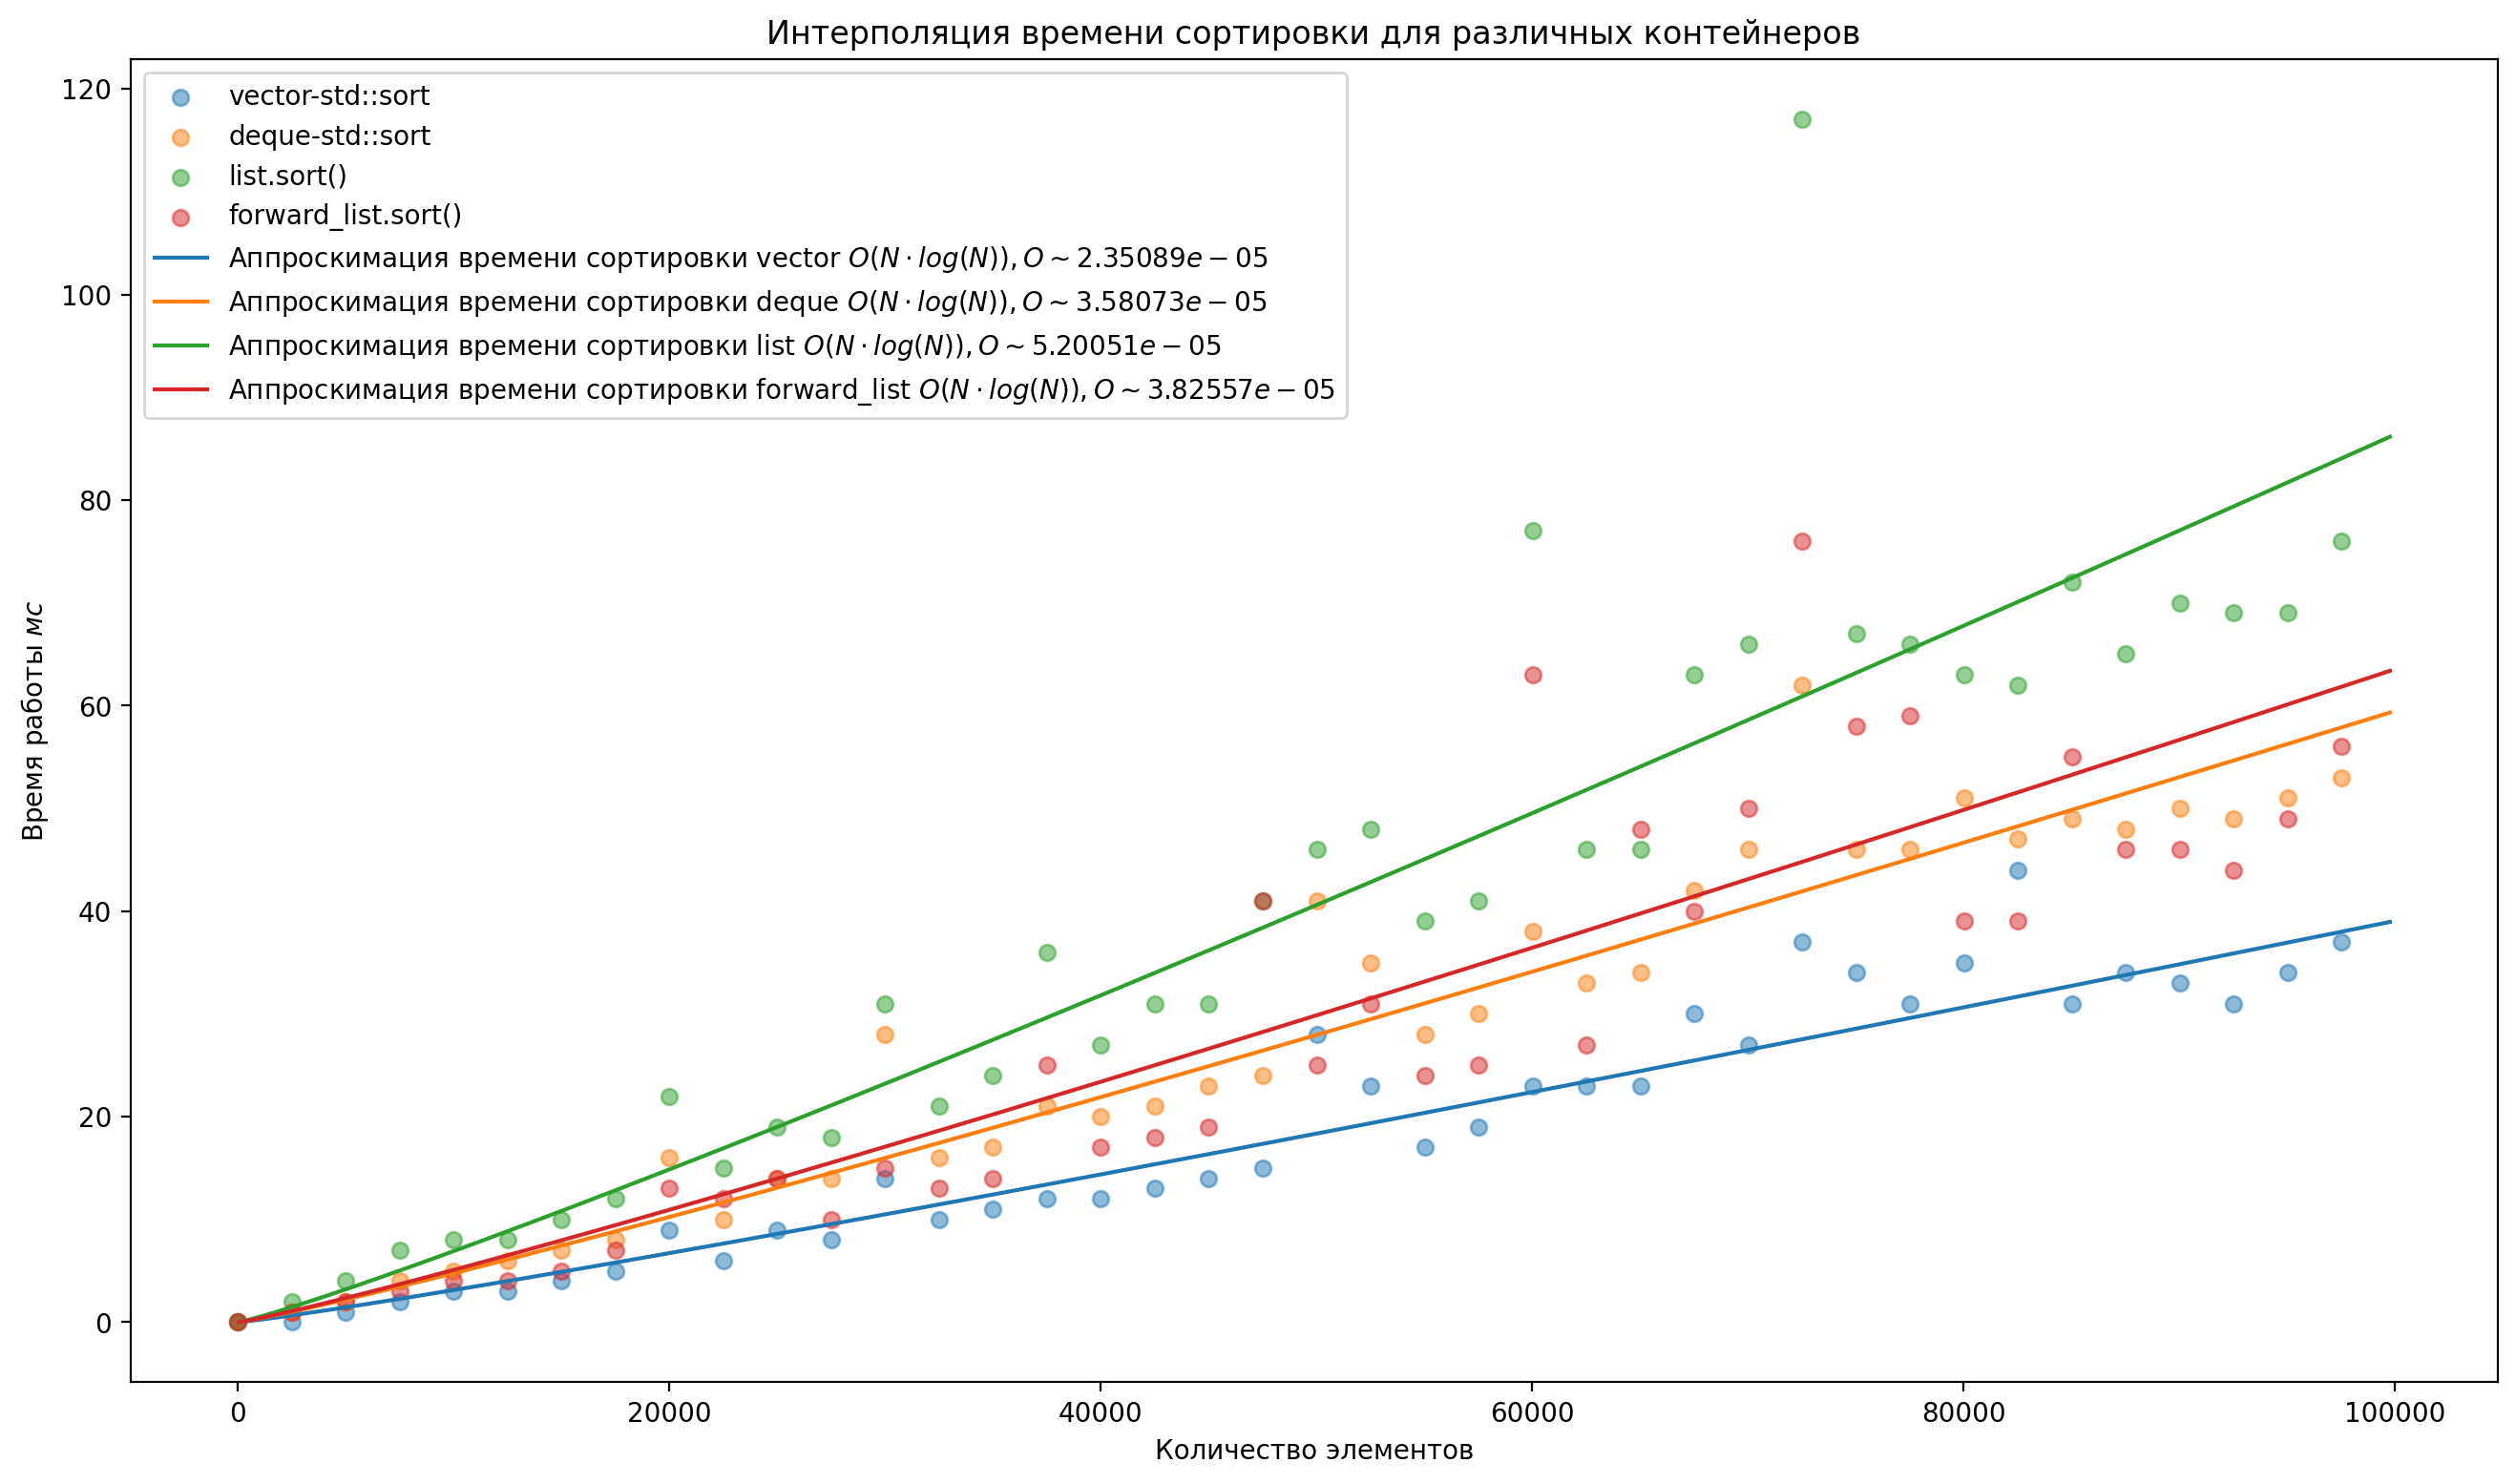

In [72]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 200)

for label,y in data.iteritems():
    plt.scatter(sizes[::10], y[::10], label = label, alpha = 0.5)

plt.plot(xAx,
         ONLogN(xAx,poptVector[0]),
         label = r"Аппроскимация времени сортировки vector $O(N \cdot log(N)), O \sim {:,g}$".format(poptVector[0]))
plt.plot(xAx,
         ONLogN(xAx,poptDeque[0]),
         label = r"Аппроскимация времени сортировки deque $O(N \cdot log(N)), O \sim {:,g}$".format(poptDeque[0]))
plt.plot(xAx,
         ONLogN(xAx,poptList[0]), 
         label = r"Аппроскимация времени сортировки list $O(N \cdot log(N)), O \sim {:,g}$".format(poptList[0]))
plt.plot(xAx,
         ONLogN(xAx,poptForwardList[0]), 
         label = r"Аппроскимация времени сортировки forward_list $O(N \cdot log(N)), O \sim {:,g}$".format(poptForwardList[0]))

plt.xlabel("Количество элементов")
plt.ylabel("Время работы $мс$")
plt.title("Интерполяция времени сортировки для различных контейнеров")
plt.legend(loc = 'upper left');